In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
plt.style.use('seaborn')

In [2]:
df = pd.read_csv('../clean_data/2017_combined_data.csv', index_col=0)

In [3]:
df.index = pd.to_datetime(df.index)
df.index = df.index.tz_localize('UTC')
df.index = df.index.tz_convert('America/New_York')

In [4]:
df_mean_hourly = df.groupby(df.index.hour).mean()

In [5]:
df_mean_hourly.head()

,pickup_count,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,Passengers
0,265.962025,282.122785,279.458439,284.504852,1015.476793,71.717300,3.383966,187.367089,688.204420
1,93.777778,281.905309,279.257407,284.356173,1015.440329,73.436214,3.279835,182.790123,428.831461
2,28.570866,281.218110,278.568465,283.741693,1015.437008,76.322835,3.366142,184.283465,266.825000
3,4.357977,281.331755,278.759770,283.829809,1015.381323,77.081712,3.073930,176.373541,150.545455
4,4.969582,280.930030,278.325734,283.508243,1014.790875,78.365019,3.155894,177.391635,147.384615


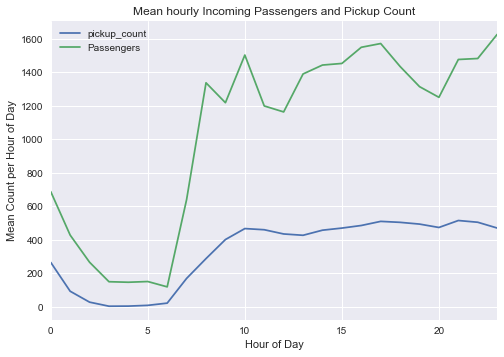

In [28]:
_ = df_mean_hourly.pickup_count.plot()
_ = df_mean_hourly.Passengers.plot()
plt.xlabel('Hour of Day')
plt.ylabel('Mean Count per Hour of Day')
plt.legend(loc='upper left')
plt.title('Mean hourly Incoming Passengers and Pickup Count')
plt.show()

In [7]:
df_daily = df.resample('D').sum()
df_daily.tail()

,pickup_count,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,Passengers
2017-06-26 00:00:00-04:00,10466,7063.17,6988.60,7124.60,24387,995,69,6537,28194.0
2017-06-27 00:00:00-04:00,9344,7619.05,7544.90,7684.90,26399,1480,53,5247,30481.0
2017-06-28 00:00:00-04:00,9464,7036.21,6967.60,7096.60,24460,1193,66,6738,27611.0
2017-06-29 00:00:00-04:00,9788,7992.51,7909.05,8066.05,27512,1493,119,5672,32204.0
2017-06-30 00:00:00-04:00,9305,8685.28,8604.35,8746.35,29443,1663,121,6487,35226.0


In [8]:
df_mean_daily = df_daily.groupby(df_daily.index.dayofweek).mean()

In [9]:
df_mean_daily.head()

,pickup_count,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,Passengers
0,13015.653846,9070.673962,8994.809346,9140.309346,32711.115385,2220.500000,114.538462,5663.153846,34576.423077
1,13466.500000,11278.105769,11184.406923,11364.483846,40562.961538,3146.807692,155.384615,5408.153846,39121.076923
2,10993.884615,9086.422462,9007.164000,9156.125538,32376.038462,2247.000000,115.269231,6045.423077,31153.923077
3,11161.692308,9218.949692,9139.892769,9290.431231,32965.769231,2209.230769,131.500000,6404.461538,31969.807692
4,11436.115385,9278.378731,9206.997962,9341.344115,33245.653846,2275.115385,124.615385,6331.230769,34840.692308


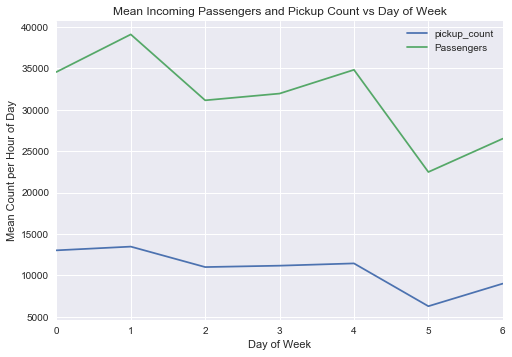

In [29]:
_ = df_mean_daily.pickup_count.plot()
_ = df_mean_daily.Passengers.plot()
plt.xlabel('Day of Week')
plt.ylabel('Mean Count per Hour of Day')
plt.legend(loc='upper right')
plt.title('Mean Incoming Passengers and Pickup Count vs Day of Week')
plt.show()

### Making bar chart comparing pickup count to incoming passengers per day of week

In [11]:
df_bar_plot = df_mean_daily.copy()

In [14]:
df_bar_plot.rename(index = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}, inplace=True)

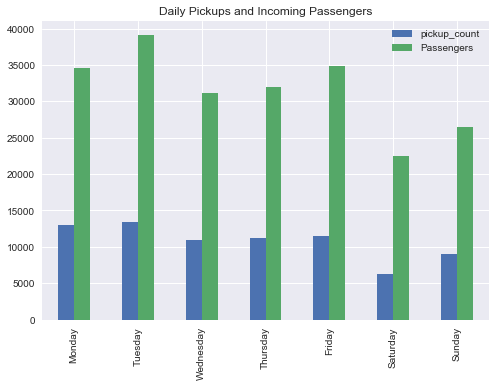

In [30]:
df_bar_plot = df_bar_plot[['pickup_count', 'Passengers']]
df_bar_plot.plot(kind='bar')
plt.title('Daily Pickups and Incoming Passengers')

### Re-Making the Hourly Plot Faceted by Weekday/Weekend

In [18]:
df2 = df.groupby([df.index.dayofweek, df.index.hour])['pickup_count', 'Passengers'].mean()

In [19]:
df3 = pd.DataFrame(df2)

In [20]:
df3.reset_index(inplace=True)

In [21]:
df4 = df3.groupby([df3.level_0 < 6, df3.level_1])['pickup_count', 'Passengers'].mean()

In [22]:
df4.index.set_levels([['Weekend', 'Weekday'], range(24)], inplace=True)

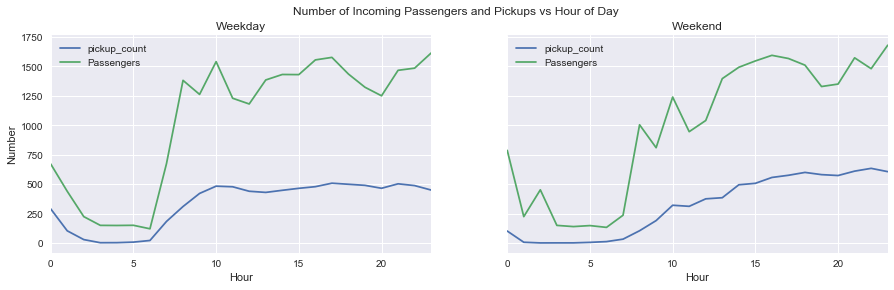

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4), sharey=True)

df4.loc['Weekday'].plot(ax=axes[0])
axes[0].set_title('Weekday')
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Number')

df4.loc['Weekend'].plot(ax=axes[1])
axes[1].set_title('Weekend')
axes[1].set_xlabel('Hour')
fig.suptitle('Number of Incoming Passengers and Pickups vs Hour of Day')